## Snowfall Depth Predictor

In [101]:
import pandas as pd
weather_train = pd.read_csv("weather_train.csv")
weather_test = pd.read_csv("weather_test.csv")


In [102]:
weather_train.describe()

,Unnamed: 0,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Moisture,Albedo (CMP11),Cloud Type,Solar Zenith Angle,Snow Depth [cm]
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000
mean,7499.500000,198.685468,238.327845,180.619177,11.963349,4.688141,-3.085643,40.379494,2.848903,167.942063,816.908084,0.373908,0.063247,0.132990,2.51280,89.540085,-5.843504
std,4330.271354,290.502386,367.967730,100.624137,10.626012,6.901612,7.291346,24.098604,2.089538,116.827730,5.066513,1.897965,0.240467,0.185299,3.00824,40.222812,244.345896
min,0.000000,-4.764200,-8.576660,0.018990,-15.750000,-16.460000,-24.191000,4.850000,0.000000,0.000000,795.152000,0.000000,0.000000,0.000000,0.00000,8.550000,-7999.000000
25%,3749.750000,-1.100810,-0.197508,90.383623,3.494000,-0.751250,-8.578500,22.200000,1.450000,43.437500,813.755500,0.000000,0.000000,0.000000,0.00000,55.890000,0.093000
50%,7499.500000,8.198795,0.296727,181.121640,12.130000,4.830000,-3.611000,33.535000,2.450000,178.500000,817.334500,0.000000,0.000000,0.000000,1.00000,89.855000,0.626000
75%,11249.250000,336.226250,522.699000,270.208625,20.450000,10.727250,2.212000,52.670000,3.700000,282.300000,820.346000,0.000000,0.000000,0.204625,6.00000,123.150000,1.035000
max,14999.000000,1244.640000,1064.160000,359.943840,36.080000,18.917000,16.750000,100.100000,23.450000,359.700000,829.392000,28.190000,1.000000,1.992100,9.00000,171.540000,28.180000


In [103]:
weather_train.head()

,Unnamed: 0,DATE (YYYY/MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Moisture,Albedo (CMP11),Cloud Type,Solar Zenith Angle,Snow Depth [cm]
0,0,2020/02/22,04:11,-1.12724,-0.365968,77.66760,8.21,0.388,-12.412,19.20,1.20,300.10,817.297,0.000,0.0,0.0000,0,50.16,9.460
1,1,2020/07/25,20:10,-1.04030,0.093816,304.73416,20.14,14.855,11.955,59.29,4.45,262.40,820.184,5.334,0.0,0.0000,7,57.39,1.121
2,2,2020/09/13,04:03,-1.29707,-0.251820,68.24852,14.08,6.560,-0.940,35.17,2.45,280.20,822.653,0.000,0.0,0.0000,8,65.63,-0.050
3,3,2020/03/08,15:25,79.20020,-0.014836,237.11811,15.03,5.725,-4.575,24.36,3.70,23.07,809.641,0.000,0.0,0.1587,6,57.08,0.734
4,4,2020/11/17,19:33,-1.61485,-0.459201,271.20406,12.66,3.180,-10.220,17.37,2.70,283.80,818.717,0.000,0.0,0.0000,0,128.59,0.013


In [104]:
weather_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             15000 non-null  int64  
 1   DATE (YYYY/MM/DD)                      15000 non-null  object 
 2   MST                                    15000 non-null  object 
 3   Global CMP22 (vent/cor) [W/m^2]        15000 non-null  float64
 4   Direct sNIP [W/m^2]                    15000 non-null  float64
 5   Azimuth Angle [degrees]                15000 non-null  float64
 6   Tower Dry Bulb Temp [deg C]            15000 non-null  float64
 7   Tower Wet Bulb Temp [deg C]            15000 non-null  float64
 8   Tower Dew Point Temp [deg C]           15000 non-null  float64
 9   Tower RH [%]                           15000 non-null  float64
 10  Peak Wind Speed @ 6ft [m/s]            15000 non-null  float64
 11  Av

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Global CMP22 (vent/cor) [W/m^2]'}>,
        <AxesSubplot:title={'center':'Direct sNIP [W/m^2]'}>,
        <AxesSubplot:title={'center':'Azimuth Angle [degrees]'}>],
       [<AxesSubplot:title={'center':'Tower Dry Bulb Temp [deg C]'}>,
        <AxesSubplot:title={'center':'Tower Wet Bulb Temp [deg C]'}>,
        <AxesSubplot:title={'center':'Tower Dew Point Temp [deg C]'}>,
        <AxesSubplot:title={'center':'Tower RH [%]'}>],
       [<AxesSubplot:title={'center':'Peak Wind Speed @ 6ft [m/s]'}>,
        <AxesSubplot:title={'center':'Avg Wind Direction @ 6ft [deg from N]'}>,
        <AxesSubplot:title={'center':'Station Pressure [mBar]'}>,
        <AxesSubplot:title={'center':'Precipitation (Accumulated) [mm]'}>],
       [<AxesSubplot:title={'center':'Moisture'}>,
        <AxesSubplot:title={'center':'Albedo (CMP11)'}>,
        <AxesSubplot:title={'center':'Cloud Type'}>,
        <AxesSubplot:tit

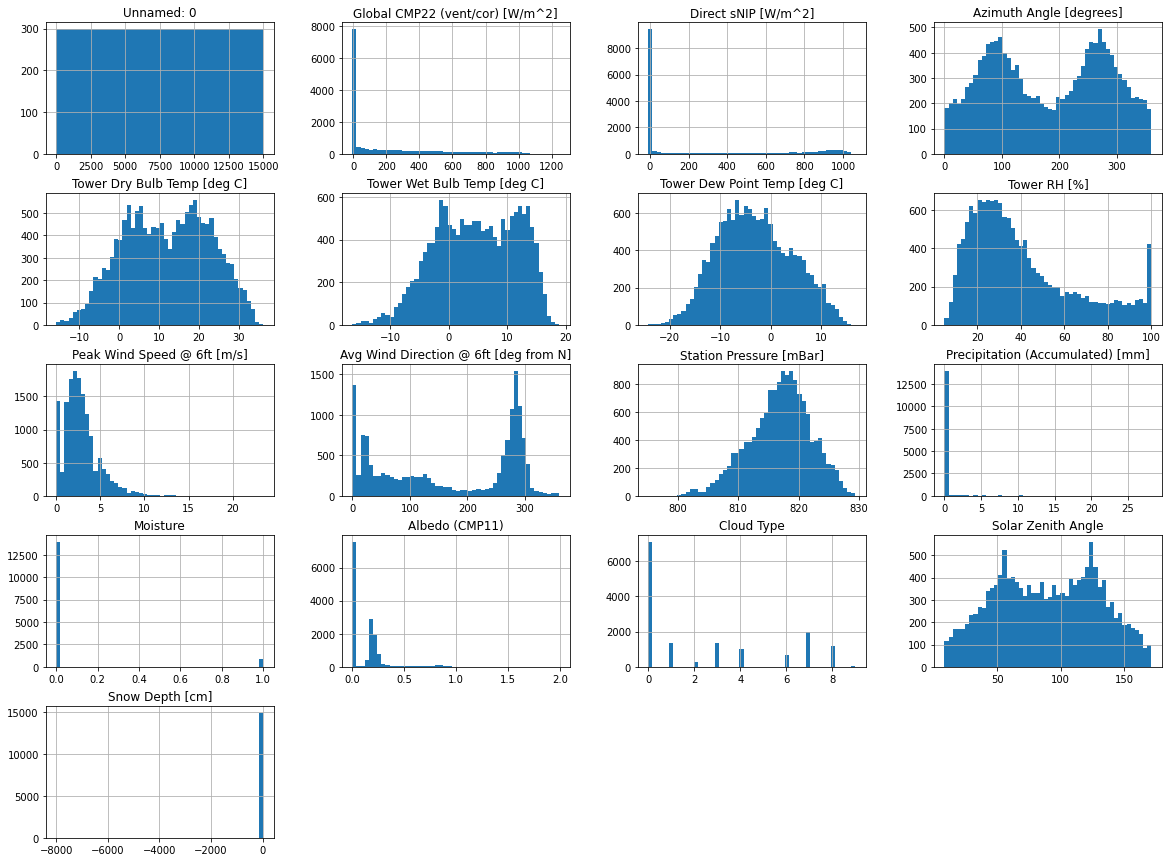

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
weather_train.hist(bins=50, figsize=(20, 15))

## Encoding Date-time Features

In [106]:
import numpy as np
def encode(data, col, max_val):
    data[col+'_sin'] = np.sin((2*np.pi*data[col]/max_val))
    data[col+'_cos'] = np.cos((2*np.pi*data[col]/max_val))

In [107]:
weather_train['Month'] = pd.to_datetime(weather_train["DATE (YYYY/MM/DD)"]).dt.month
weather_train['Day'] = pd.to_datetime(weather_train["DATE (YYYY/MM/DD)"]).dt.day
weather_train['Hour'] = pd.to_datetime(weather_train["MST"]).dt.hour
weather_test['Month'] = pd.to_datetime(weather_test["DATE (YYYY/MM/DD)"]).dt.month
weather_test['Day'] = pd.to_datetime(weather_test["DATE (YYYY/MM/DD)"]).dt.day
weather_test['Hour'] = pd.to_datetime(weather_test["MST"]).dt.hour

weather_train.head()

,Unnamed: 0,DATE (YYYY/MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],...,Station Pressure [mBar],Precipitation (Accumulated) [mm],Moisture,Albedo (CMP11),Cloud Type,Solar Zenith Angle,Snow Depth [cm],Month,Day,Hour
0,0,2020/02/22,04:11,-1.12724,-0.365968,77.66760,8.21,0.388,-12.412,19.20,...,817.297,0.000,0.0,0.0000,0,50.16,9.460,2,22,4
1,1,2020/07/25,20:10,-1.04030,0.093816,304.73416,20.14,14.855,11.955,59.29,...,820.184,5.334,0.0,0.0000,7,57.39,1.121,7,25,20
2,2,2020/09/13,04:03,-1.29707,-0.251820,68.24852,14.08,6.560,-0.940,35.17,...,822.653,0.000,0.0,0.0000,8,65.63,-0.050,9,13,4
3,3,2020/03/08,15:25,79.20020,-0.014836,237.11811,15.03,5.725,-4.575,24.36,...,809.641,0.000,0.0,0.1587,6,57.08,0.734,3,8,15
4,4,2020/11/17,19:33,-1.61485,-0.459201,271.20406,12.66,3.180,-10.220,17.37,...,818.717,0.000,0.0,0.0000,0,128.59,0.013,11,17,19


In [108]:
encode(weather_train, 'Month', 12)
encode(weather_train, 'Day', 365)
encode(weather_train,'Hour', 24)
encode(weather_test, 'Month', 12)
encode(weather_test, 'Day', 365)
encode(weather_test,'Hour', 24)

weather_train.head()

,Unnamed: 0,DATE (YYYY/MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],...,Snow Depth [cm],Month,Day,Hour,Month_sin,Month_cos,Day_sin,Day_cos,Hour_sin,Hour_cos
0,0,2020/02/22,04:11,-1.12724,-0.365968,77.66760,8.21,0.388,-12.412,19.20,...,9.460,2,22,4,0.866025,5.000000e-01,0.369725,0.929141,0.866025,0.500000
1,1,2020/07/25,20:10,-1.04030,0.093816,304.73416,20.14,14.855,11.955,59.29,...,1.121,7,25,20,-0.500000,-8.660254e-01,0.417194,0.908818,-0.866025,0.500000
2,2,2020/09/13,04:03,-1.29707,-0.251820,68.24852,14.08,6.560,-0.940,35.17,...,-0.050,9,13,4,-1.000000,-1.836970e-16,0.221922,0.975065,0.866025,0.500000
3,3,2020/03/08,15:25,79.20020,-0.014836,237.11811,15.03,5.725,-4.575,24.36,...,0.734,3,8,15,1.000000,6.123234e-17,0.137279,0.990532,-0.707107,-0.707107
4,4,2020/11/17,19:33,-1.61485,-0.459201,271.20406,12.66,3.180,-10.220,17.37,...,0.013,11,17,19,-0.500000,8.660254e-01,0.288482,0.957485,-0.965926,0.258819


## Data Cleaning

In [109]:
# Dropping Serial No., DATE, MST, Month, Day, Hour columns from train and test data
weather_train.drop(weather_train.columns[[0, 1, 2, 19, 20, 21]], axis=1, inplace=True)
weather_test.drop(weather_test.columns[[0, 1, 2, 18, 19, 20]], axis=1, inplace=True)

In [110]:
weather_test.describe()

,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],...,Moisture,Albedo (CMP11),Cloud Type,Solar Zenith Angle,Month_sin,Month_cos,Day_sin,Day_cos,Hour_sin,Hour_cos
count,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,...,2406.000000,2406.000000,2406.000000,2406.000000,2.406000e+03,2.406000e+03,2406.000000,2406.000000,2406.000000,2.406000e+03
mean,215.077119,252.872422,180.738360,10.600240,3.821505,-3.690424,42.347573,2.927473,160.210251,816.330670,...,0.078076,0.144898,2.708645,90.300786,1.041752e-01,-1.200044e-02,0.259903,0.953004,-0.020174,-6.223183e-02
std,302.532034,379.202035,97.600946,10.920335,7.194996,7.582714,25.127915,2.068019,115.934947,5.008511,...,0.265756,0.196123,3.154297,40.592633,6.735696e-01,7.319281e-01,0.149858,0.042267,0.694354,7.169424e-01
min,-2.873540,-5.599270,0.121450,-15.530000,-16.278000,-23.667000,5.329000,0.000000,0.000000,796.249000,...,0.000000,0.000000,0.000000,9.050000,-1.000000e+00,-1.000000e+00,0.017213,0.860961,-1.000000,-1.000000e+00
25%,-0.987484,-0.187931,93.333677,2.064250,-1.602000,-9.494000,23.407500,1.450000,36.812500,813.004750,...,0.000000,0.000000,0.000000,56.585000,-5.000000e-01,-8.660254e-01,0.120208,0.917558,-0.707107,-8.660254e-01
50%,28.943850,0.395640,183.042310,9.995000,3.299000,-4.461500,35.115000,2.700000,149.600000,816.649000,...,0.000000,0.151950,0.000000,91.295000,1.224647e-16,6.123234e-17,0.255353,0.966848,0.000000,-1.836970e-16
75%,368.512500,592.201250,266.627380,19.190000,10.414750,1.781000,56.947500,3.950000,279.300000,819.682750,...,0.000000,0.204975,7.000000,123.357500,8.660254e-01,8.660254e-01,0.397532,0.992749,0.707107,7.071068e-01
max,1259.960000,1064.570000,359.729190,35.990000,17.831000,16.161000,100.100000,14.200000,359.300000,829.033000,...,1.000000,1.536600,9.000000,171.480000,1.000000e+00,1.000000e+00,0.508671,0.999852,1.000000,1.000000e+00


In [111]:
weather_train.loc[weather_train["Snow Depth [cm]"] < 0, "Snow Depth [cm]"]=None

In [112]:
weather_train.describe()


,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],...,Albedo (CMP11),Cloud Type,Solar Zenith Angle,Snow Depth [cm],Month_sin,Month_cos,Day_sin,Day_cos,Hour_sin,Hour_cos
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.00000,15000.000000,12091.000000,1.500000e+04,1.500000e+04,15000.000000,15000.000000,15000.000000,1.500000e+04
mean,198.685468,238.327845,180.619177,11.963349,4.688141,-3.085643,40.379494,2.848903,167.942063,816.908084,...,0.132990,2.51280,89.540085,2.057863,-7.328501e-03,-4.344956e-03,0.265122,0.952379,-0.002921,-5.740741e-03
std,290.502386,367.967730,100.624137,10.626012,6.901612,7.291346,24.098604,2.089538,116.827730,5.066513,...,0.185299,3.00824,40.222812,4.055838,7.103496e-01,7.038448e-01,0.144789,0.041502,0.705344,7.088825e-01
min,-4.764200,-8.576660,0.018990,-15.750000,-16.460000,-24.191000,4.850000,0.000000,0.000000,795.152000,...,0.000000,0.00000,8.550000,0.000000,-1.000000e+00,-1.000000e+00,0.017213,0.860961,-1.000000,-1.000000e+00
25%,-1.100810,-0.197508,90.383623,3.494000,-0.751250,-8.578500,22.200000,1.450000,43.437500,813.755500,...,0.000000,0.00000,55.890000,0.352500,-8.660254e-01,-5.000000e-01,0.137279,0.922640,-0.707107,-7.071068e-01
50%,8.198795,0.296727,181.121640,12.130000,4.830000,-3.611000,33.535000,2.450000,178.500000,817.334500,...,0.000000,1.00000,89.855000,0.812000,-2.449294e-16,-1.836970e-16,0.271958,0.962309,0.000000,-1.836970e-16
75%,336.226250,522.699000,270.208625,20.450000,10.727250,2.212000,52.670000,3.700000,282.300000,820.346000,...,0.204625,6.00000,123.150000,1.124000,5.000000e-01,5.000000e-01,0.385663,0.990532,0.707107,7.071068e-01
max,1244.640000,1064.160000,359.943840,36.080000,18.917000,16.750000,100.100000,23.450000,359.700000,829.392000,...,1.992100,9.00000,171.540000,28.180000,1.000000e+00,1.000000e+00,0.508671,0.999852,1.000000,1.000000e+00


In [113]:
weather_train.head()

,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],...,Albedo (CMP11),Cloud Type,Solar Zenith Angle,Snow Depth [cm],Month_sin,Month_cos,Day_sin,Day_cos,Hour_sin,Hour_cos
0,-1.12724,-0.365968,77.66760,8.21,0.388,-12.412,19.20,1.20,300.10,817.297,...,0.0000,0,50.16,9.460,0.866025,5.000000e-01,0.369725,0.929141,0.866025,0.500000
1,-1.04030,0.093816,304.73416,20.14,14.855,11.955,59.29,4.45,262.40,820.184,...,0.0000,7,57.39,1.121,-0.500000,-8.660254e-01,0.417194,0.908818,-0.866025,0.500000
2,-1.29707,-0.251820,68.24852,14.08,6.560,-0.940,35.17,2.45,280.20,822.653,...,0.0000,8,65.63,NaN,-1.000000,-1.836970e-16,0.221922,0.975065,0.866025,0.500000
3,79.20020,-0.014836,237.11811,15.03,5.725,-4.575,24.36,3.70,23.07,809.641,...,0.1587,6,57.08,0.734,1.000000,6.123234e-17,0.137279,0.990532,-0.707107,-0.707107
4,-1.61485,-0.459201,271.20406,12.66,3.180,-10.220,17.37,2.70,283.80,818.717,...,0.0000,0,128.59,0.013,-0.500000,8.660254e-01,0.288482,0.957485,-0.965926,0.258819


In [114]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(weather_train)
X = imputer.transform(weather_train)
weather_tr = pd.DataFrame(X, columns=weather_train.columns)
weather_tr.describe()

,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],...,Albedo (CMP11),Cloud Type,Solar Zenith Angle,Snow Depth [cm],Month_sin,Month_cos,Day_sin,Day_cos,Hour_sin,Hour_cos
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.00000,15000.000000,15000.000000,1.500000e+04,1.500000e+04,15000.000000,15000.000000,15000.000000,1.500000e+04
mean,198.685468,238.327845,180.619177,11.963349,4.688141,-3.085643,40.379494,2.848903,167.942063,816.908084,...,0.132990,2.51280,89.540085,1.816249,-7.328501e-03,-4.344956e-03,0.265122,0.952379,-0.002921,-5.740741e-03
std,290.502386,367.967730,100.624137,10.626012,6.901612,7.291346,24.098604,2.089538,116.827730,5.066513,...,0.185299,3.00824,40.222812,3.674520,7.103496e-01,7.038448e-01,0.144789,0.041502,0.705344,7.088825e-01
min,-4.764200,-8.576660,0.018990,-15.750000,-16.460000,-24.191000,4.850000,0.000000,0.000000,795.152000,...,0.000000,0.00000,8.550000,0.000000,-1.000000e+00,-1.000000e+00,0.017213,0.860961,-1.000000,-1.000000e+00
25%,-1.100810,-0.197508,90.383623,3.494000,-0.751250,-8.578500,22.200000,1.450000,43.437500,813.755500,...,0.000000,0.00000,55.890000,0.452000,-8.660254e-01,-5.000000e-01,0.137279,0.922640,-0.707107,-7.071068e-01
50%,8.198795,0.296727,181.121640,12.130000,4.830000,-3.611000,33.535000,2.450000,178.500000,817.334500,...,0.000000,1.00000,89.855000,0.812000,-2.449294e-16,-1.836970e-16,0.271958,0.962309,0.000000,-1.836970e-16
75%,336.226250,522.699000,270.208625,20.450000,10.727250,2.212000,52.670000,3.700000,282.300000,820.346000,...,0.204625,6.00000,123.150000,1.035000,5.000000e-01,5.000000e-01,0.385663,0.990532,0.707107,7.071068e-01
max,1244.640000,1064.160000,359.943840,36.080000,18.917000,16.750000,100.100000,23.450000,359.700000,829.392000,...,1.992100,9.00000,171.540000,28.180000,1.000000e+00,1.000000e+00,0.508671,0.999852,1.000000,1.000000e+00


array([[<AxesSubplot:title={'center':'Global CMP22 (vent/cor) [W/m^2]'}>,
        <AxesSubplot:title={'center':'Direct sNIP [W/m^2]'}>,
        <AxesSubplot:title={'center':'Azimuth Angle [degrees]'}>,
        <AxesSubplot:title={'center':'Tower Dry Bulb Temp [deg C]'}>,
        <AxesSubplot:title={'center':'Tower Wet Bulb Temp [deg C]'}>],
       [<AxesSubplot:title={'center':'Tower Dew Point Temp [deg C]'}>,
        <AxesSubplot:title={'center':'Tower RH [%]'}>,
        <AxesSubplot:title={'center':'Peak Wind Speed @ 6ft [m/s]'}>,
        <AxesSubplot:title={'center':'Avg Wind Direction @ 6ft [deg from N]'}>,
        <AxesSubplot:title={'center':'Station Pressure [mBar]'}>],
       [<AxesSubplot:title={'center':'Precipitation (Accumulated) [mm]'}>,
        <AxesSubplot:title={'center':'Moisture'}>,
        <AxesSubplot:title={'center':'Albedo (CMP11)'}>,
        <AxesSubplot:title={'center':'Cloud Type'}>,
        <AxesSubplot:title={'center':'Solar Zenith Angle'}>],
       [<AxesSub

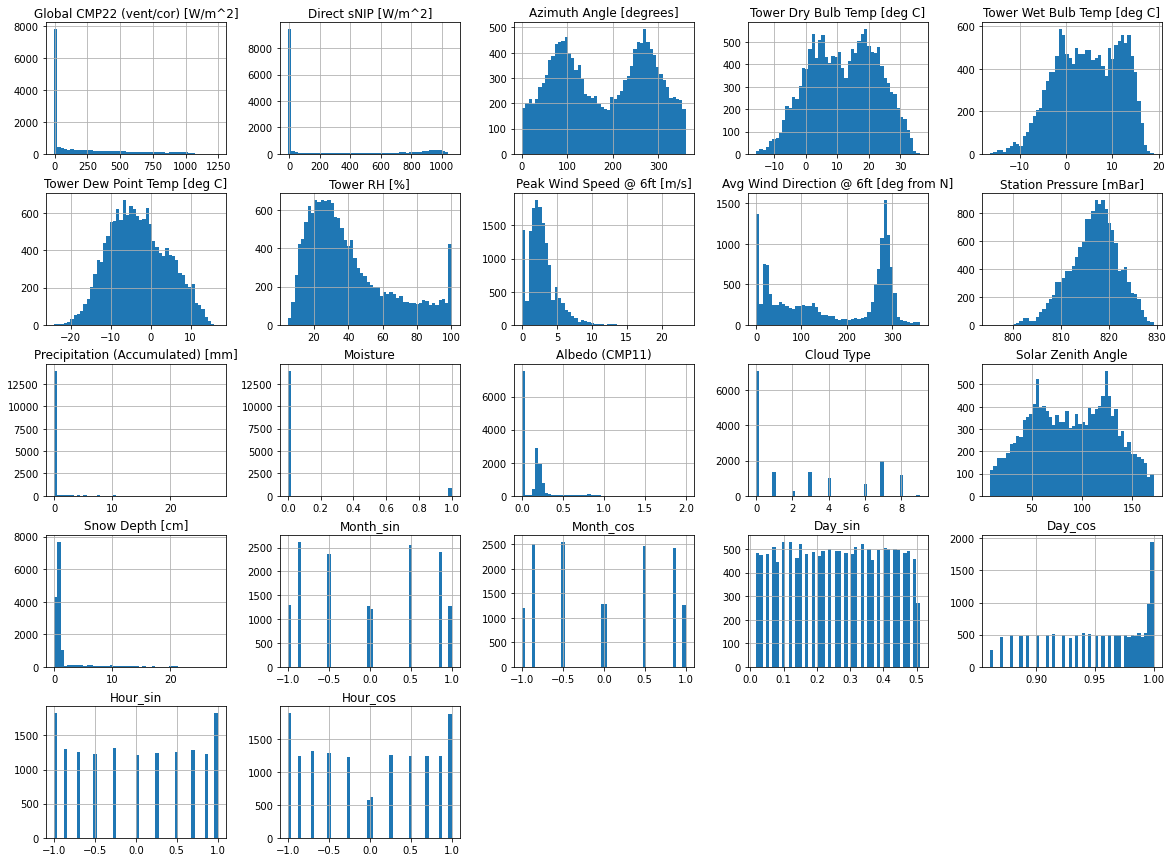

In [115]:
%matplotlib inline
import matplotlib.pyplot as plt
weather_tr.hist(bins=50, figsize=(20, 15))

## Train-Test Splitting

In [116]:
weather_tr.shape

(15000, 22)

In [117]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(weather_tr, weather_tr["Hour_sin"]):
    strat_train_set = weather_tr.loc[train_index]
    strat_test_set = weather_tr.loc[test_index]

In [118]:
print(f"Rows in train set: {len(strat_train_set)}\nRows in test set: {len(strat_test_set)}")

Rows in train set: 12000
Rows in test set: 3000


In [119]:
strat_train_set['Month_sin'].value_counts()

 5.000000e-01    2061
-8.660254e-01    1044
-8.660254e-01    1036
-1.000000e+00    1030
 1.000000e+00    1021
-2.449294e-16    1020
-5.000000e-01     989
 1.224647e-16     986
 8.660254e-01     975
 8.660254e-01     930
-5.000000e-01     908
Name: Month_sin, dtype: int64

In [120]:
strat_test_set['Month_sin'].value_counts()

 5.000000e-01    498
-8.660254e-01    282
-8.660254e-01    263
-1.000000e+00    259
 8.660254e-01    256
 1.000000e+00    252
 8.660254e-01    247
-2.449294e-16    245
-5.000000e-01    241
-5.000000e-01    233
 1.224647e-16    224
Name: Month_sin, dtype: int64

In [121]:
weather = strat_train_set.copy()

## Finding Correlations

In [122]:
corr_matrix = weather.corr()
corr_matrix["Snow Depth [cm]"].sort_values(ascending=False)

Snow Depth [cm]                          1.000000
Tower RH [%]                             0.340507
Albedo (CMP11)                           0.337241
Month_sin                                0.296568
Moisture                                 0.280784
Precipitation (Accumulated) [mm]         0.165606
Month_cos                                0.149043
Day_cos                                  0.043221
Hour_sin                                 0.011901
Cloud Type                               0.003771
Solar Zenith Angle                       0.003673
Hour_cos                                 0.000833
Azimuth Angle [degrees]                 -0.010479
Day_sin                                 -0.011607
Direct sNIP [W/m^2]                     -0.041725
Global CMP22 (vent/cor) [W/m^2]         -0.044132
Avg Wind Direction @ 6ft [deg from N]   -0.073187
Station Pressure [mBar]                 -0.105748
Peak Wind Speed @ 6ft [m/s]             -0.132617
Tower Dew Point Temp [deg C]            -0.205751


array([[<AxesSubplot:xlabel='Snow Depth [cm]', ylabel='Snow Depth [cm]'>,
        <AxesSubplot:xlabel='Month_sin', ylabel='Snow Depth [cm]'>,
        <AxesSubplot:xlabel='Albedo (CMP11)', ylabel='Snow Depth [cm]'>,
        <AxesSubplot:xlabel='Tower Dry Bulb Temp [deg C]', ylabel='Snow Depth [cm]'>,
        <AxesSubplot:xlabel='Tower Dew Point Temp [deg C]', ylabel='Snow Depth [cm]'>],
       [<AxesSubplot:xlabel='Snow Depth [cm]', ylabel='Month_sin'>,
        <AxesSubplot:xlabel='Month_sin', ylabel='Month_sin'>,
        <AxesSubplot:xlabel='Albedo (CMP11)', ylabel='Month_sin'>,
        <AxesSubplot:xlabel='Tower Dry Bulb Temp [deg C]', ylabel='Month_sin'>,
        <AxesSubplot:xlabel='Tower Dew Point Temp [deg C]', ylabel='Month_sin'>],
       [<AxesSubplot:xlabel='Snow Depth [cm]', ylabel='Albedo (CMP11)'>,
        <AxesSubplot:xlabel='Month_sin', ylabel='Albedo (CMP11)'>,
        <AxesSubplot:xlabel='Albedo (CMP11)', ylabel='Albedo (CMP11)'>,
        <AxesSubplot:xlabel='Tower Dry B

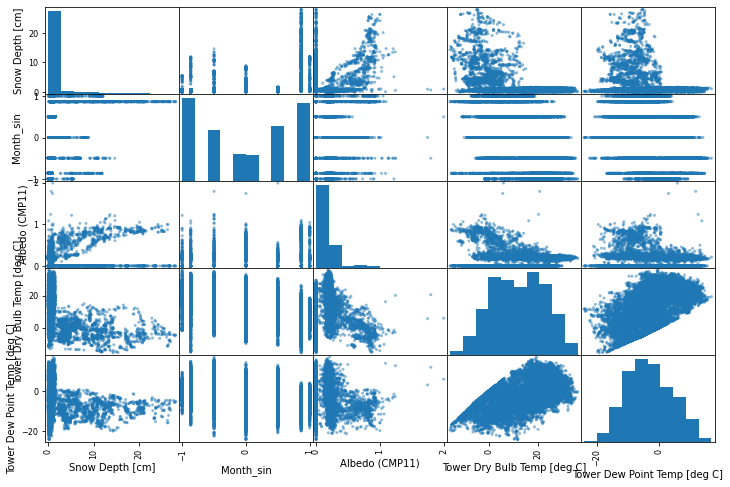

In [123]:
from pandas.plotting import scatter_matrix
attributes = ["Snow Depth [cm]", "Month_sin", "Albedo (CMP11)", "Tower Dry Bulb Temp [deg C]", "Tower Dew Point Temp [deg C]"]
scatter_matrix(weather[attributes], figsize=(12,8))

([<matplotlib.axis.YTick at 0x1f2ecca0400>,
 [Text(0, 0, 'Global CMP22 (vent/cor) [W/m^2]'),
  Text(0, 1, 'Direct sNIP [W/m^2]'),
  Text(0, 2, 'Azimuth Angle [degrees]'),
  Text(0, 3, 'Tower Dry Bulb Temp [deg C]'),
  Text(0, 4, 'Tower Wet Bulb Temp [deg C]'),
  Text(0, 5, 'Tower Dew Point Temp [deg C]'),
  Text(0, 6, 'Tower RH [%]'),
  Text(0, 7, 'Peak Wind Speed @ 6ft [m/s]'),
  Text(0, 8, 'Avg Wind Direction @ 6ft [deg from N]'),
  Text(0, 9, 'Station Pressure [mBar]'),
  Text(0, 10, 'Precipitation (Accumulated) [mm]'),
  Text(0, 11, 'Moisture'),
  Text(0, 12, 'Albedo (CMP11)'),
  Text(0, 13, 'Cloud Type'),
  Text(0, 14, 'Solar Zenith Angle'),
  Text(0, 15, 'Snow Depth [cm]'),
  Text(0, 16, 'Month_sin'),
  Text(0, 17, 'Month_cos'),
  Text(0, 18, 'Day_sin'),
  Text(0, 19, 'Day_cos'),
  Text(0, 20, 'Hour_sin'),
  Text(0, 21, 'Hour_cos')])

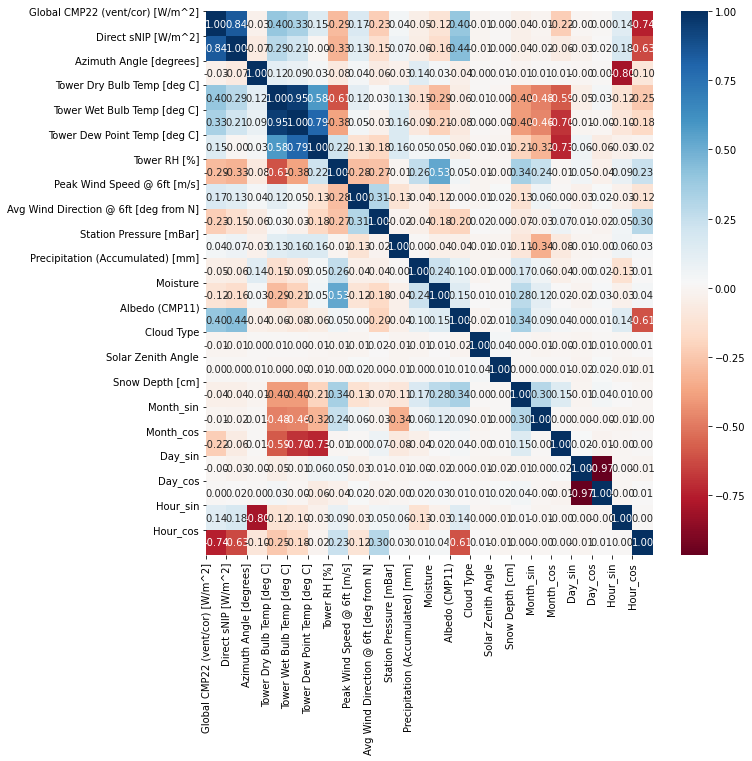

In [124]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix, cmap="RdBu", annot=True, fmt=".2f")
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

## Trying out Attribute Combinations for Strong Correlation

In [125]:
weather["Temperature/Pressure [deg C/mBar]"] = weather["Tower Dry Bulb Temp [deg C]"]/weather["Station Pressure [mBar]"]
strat_test_set["Temperature/Pressure [deg C/mBar]"] = strat_test_set["Tower Dry Bulb Temp [deg C]"]/strat_test_set["Station Pressure [mBar]"]
weather_test["Temperature/Pressure [deg C/mBar]"] = weather_test["Tower Dry Bulb Temp [deg C]"]/weather_test["Station Pressure [mBar]"]

In [126]:
corr_matrix = weather.corr()
corr_matrix["Snow Depth [cm]"].sort_values(ascending=False)

Snow Depth [cm]                          1.000000
Tower RH [%]                             0.340507
Albedo (CMP11)                           0.337241
Month_sin                                0.296568
Moisture                                 0.280784
Precipitation (Accumulated) [mm]         0.165606
Month_cos                                0.149043
Day_cos                                  0.043221
Hour_sin                                 0.011901
Cloud Type                               0.003771
Solar Zenith Angle                       0.003673
Hour_cos                                 0.000833
Azimuth Angle [degrees]                 -0.010479
Day_sin                                 -0.011607
Direct sNIP [W/m^2]                     -0.041725
Global CMP22 (vent/cor) [W/m^2]         -0.044132
Avg Wind Direction @ 6ft [deg from N]   -0.073187
Station Pressure [mBar]                 -0.105748
Peak Wind Speed @ 6ft [m/s]             -0.132617
Tower Dew Point Temp [deg C]            -0.205751


<AxesSubplot:xlabel='Temperature/Pressure [deg C/mBar]', ylabel='Snow Depth [cm]'>

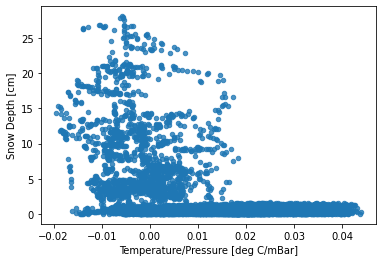

In [127]:
weather.plot(kind='scatter', x='Temperature/Pressure [deg C/mBar]', y='Snow Depth [cm]', alpha=0.8)

In [128]:
weather_labels = weather["Snow Depth [cm]"].copy()
weather = weather.drop("Snow Depth [cm]", axis=1)


In [129]:
weather.describe()

,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],...,Albedo (CMP11),Cloud Type,Solar Zenith Angle,Month_sin,Month_cos,Day_sin,Day_cos,Hour_sin,Hour_cos,Temperature/Pressure [deg C/mBar]
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,...,12000.000000,12000.000000,12000.000000,1.200000e+04,1.200000e+04,12000.000000,12000.000000,12000.000000,1.200000e+04,12000.000000
mean,198.550941,238.487947,180.513615,12.001097,4.702011,-3.099001,40.253086,2.84200,167.936924,816.924377,...,0.132842,2.507833,89.530055,-6.546204e-03,-5.292840e-03,0.265769,0.952240,-0.003044,-5.203533e-03,0.014681
std,290.540217,368.008892,100.642934,10.631328,6.895963,7.295712,24.107139,2.07212,116.991102,5.073343,...,0.185307,3.004584,40.202727,7.088276e-01,7.053906e-01,0.144533,0.041443,0.705387,7.088551e-01,0.013001
min,-4.764200,-8.576660,0.018990,-15.750000,-16.460000,-24.191000,4.850000,0.00000,0.000000,795.152000,...,0.000000,0.000000,8.550000,-1.000000e+00,-1.000000e+00,0.017213,0.860961,-1.000000,-1.000000e+00,-0.019461
25%,-1.101808,-0.197508,90.248125,3.536500,-0.730000,-8.584250,22.050000,1.45000,42.445000,813.762750,...,0.000000,0.000000,55.870000,-8.660254e-01,-8.660254e-01,0.137279,0.922640,-0.707107,-7.071068e-01,0.004328
50%,8.095410,0.296260,181.083495,12.170000,4.852000,-3.574500,33.370000,2.45000,177.450000,817.336500,...,0.000000,1.000000,89.650000,-2.449294e-16,-1.836970e-16,0.271958,0.962309,0.000000,-1.836970e-16,0.014924
75%,334.741500,524.524000,270.045438,20.500000,10.736500,2.243250,52.630000,3.70000,282.300000,820.382250,...,0.204700,6.000000,123.032500,5.000000e-01,5.000000e-01,0.385663,0.990532,0.707107,7.071068e-01,0.025066
max,1244.640000,1064.160000,359.896070,36.080000,18.259000,16.750000,100.100000,20.20000,359.700000,829.392000,...,1.992100,9.000000,171.540000,1.000000e+00,1.000000e+00,0.508671,0.999852,1.000000,1.000000e+00,0.043856


## Creating a Pipeline

In [130]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std scaler', StandardScaler())
])

In [131]:
weather_num_tr = my_pipeline.fit_transform(weather)
weather_num_tr.shape

(12000, 22)

## Selecting a desired model

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
#model = SVR()
model.fit(weather_num_tr, weather_labels)

RandomForestRegressor()

## Evaluating the model

In [133]:
from sklearn.metrics import mean_squared_error
sd_predictions = model.predict(weather_num_tr)
mse = mean_squared_error(weather_labels, sd_predictions)
rmse = np.sqrt(mse)
print(rmse)

0.2011960649804274


## Cross Validation

In [134]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, weather_num_tr, weather_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [135]:
print(f"Scores : {rmse_scores}\nMean : {rmse_scores.mean()}\nSTD : {rmse_scores.std()}")

Scores : [0.49467578 0.5003941  0.61731637 0.67595248 0.41450157 0.65941378
 0.45174836 0.64255101 0.4389199  0.49303272]
Mean : 0.5388506057882816
STD : 0.09423814308332826


## Testing the model on test data

In [136]:
X_test = strat_test_set.drop("Snow Depth [cm]", axis=1)
Y_test = strat_test_set["Snow Depth [cm]"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(final_rmse)

0.4490028224863034


## Saving the model

In [137]:
from joblib import dump, load
dump(model, "SnowDepth.joblib")

['SnowDepth.joblib']

## Submitting Predictions

In [138]:
loaded_model = load("SnowDepth.joblib")
X_test_sub = my_pipeline.transform(weather_test)
my_predictions = loaded_model.predict(X_test_sub)
print(len(my_predictions))

2406


In [140]:
my_sub = pd.DataFrame(my_predictions)
my_sub.to_csv("My Submission.csv")